In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Считываем исходные данные о динамике заработной платы за 2000-2023 гг.

In [3]:
df_salary = pd.read_csv('data/raw_data_salary.csv')
df_salary.head()

,Вид деятеяльности,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,"Производство электрооборудования, электронного...",2004,2999,3816,5109,6432,8219,10290,13114,16609,...,32779,36765,39998,46928,51492,53982,56672,64614,74835,91970
1,Образование,1240,1833,2927,3387,4203,5430,6983,8778,11317,...,25862,26928,28088,30258,34361,37072,39563,43391,48400,54315
2,Здравоохранение и предоставление социальных услуг,1333,1960,3141,3663,4612,5906,8060,10037,13049,...,27068,28179,29742,31980,40027,43122,49532,50690,55420,61651


Удалим первый столбец датафрейма

In [4]:
df_salary = df_salary.iloc[:, 1:].astype(float)
df_salary.head()

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,2004.0,2999.0,3816.0,5109.0,6432.0,8219.0,10290.0,13114.0,16609.0,17360.0,...,32779.0,36765.0,39998.0,46928.0,51492.0,53982.0,56672.0,64614.0,74835.0,91970.0
1,1240.0,1833.0,2927.0,3387.0,4203.0,5430.0,6983.0,8778.0,11317.0,13294.0,...,25862.0,26928.0,28088.0,30258.0,34361.0,37072.0,39563.0,43391.0,48400.0,54315.0
2,1333.0,1960.0,3141.0,3663.0,4612.0,5906.0,8060.0,10037.0,13049.0,14820.0,...,27068.0,28179.0,29742.0,31980.0,40027.0,43122.0,49532.0,50690.0,55420.0,61651.0


Считаем интересующий нас интервал времени в переменную years

In [5]:
years = df_salary.columns[:]

Сохраним значения заработной платы для каждой из трех отраслей в соответствующие переменные

In [6]:
man = df_salary.iloc[0][:]
edu = df_salary.iloc[1][:]
med = df_salary.iloc[2][:]

Построим график изменения зарплат по данным отраслям

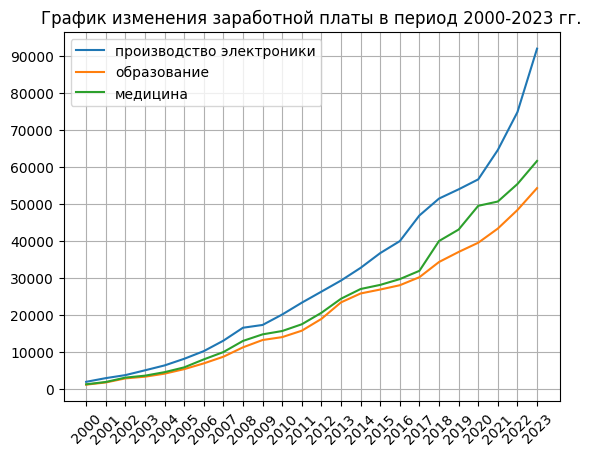

In [7]:
fig, ax = plt.subplots()
ax.plot(years, man, label='производство электроники')
ax.plot(years, edu, label='образование')
ax.plot(years, med, label='медицина')
ax.set_xticks(years)
ax.set_xticklabels(years, rotation=45)
ax.yaxis.set_major_locator(plt.MultipleLocator(10000))
ax.legend()
ax.set_title('График изменения заработной платы в период 2000-2023 гг.')
ax.grid()

Рассчитаем относительное изменение зарплат в % относительно предыдущего года 

In [8]:
df_salary_rel = df_salary.copy(deep=True)
for index, row in df_salary.iterrows():
    for i in range(1,len(row)):
        df_salary_rel.iat[index, i] = (df_salary.iat[index, i] - df_salary.iat[index, i-1]) / df_salary.iat[index, i-1] * 100      
df_salary_rel.head()

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,2004.0,49.650699,27.242414,33.883648,25.895479,27.782960,25.197713,27.444121,26.650907,4.521645,...,11.667916,12.160225,8.793690,17.325866,9.725537,4.835703,4.983143,14.013975,15.818553,22.897040
1,1240.0,47.822581,59.683579,15.715750,24.092117,29.193433,28.600368,25.705284,28.924584,17.469294,...,10.248103,4.121878,4.307784,7.725719,13.560050,7.889759,6.719357,9.675707,11.543869,12.221074
2,1333.0,47.036759,60.255102,16.618911,25.907726,28.057242,36.471385,24.528536,30.008967,13.571921,...,10.757396,4.104478,5.546684,7.524713,25.162602,7.732281,14.864802,2.337883,9.331229,11.243233


Первый столбец нам не нужен, так как его невозможно посчитать в относительных единицах, поскольку данные за 1999 год отсутствуют

In [18]:
man = df_salary_rel.iloc[0][1:]
edu = df_salary_rel.iloc[1][1:]
med = df_salary_rel.iloc[2][1:]
years_2001 = np.array(range(2001, 2024))

Построим график изменения зарплат в относительных (по сравнению с предыдущим годом) единицах

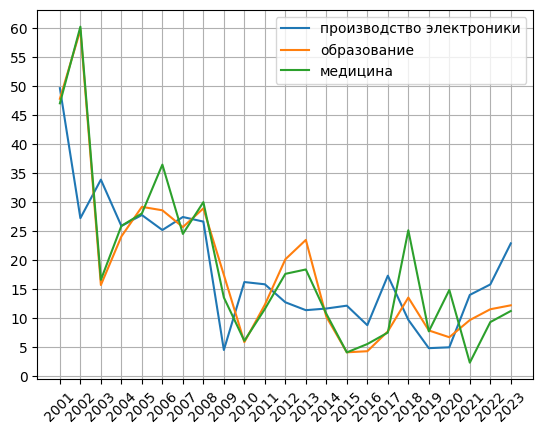

In [10]:
fig, ax = plt.subplots()
ax.plot(years_2001, man, label='производство электроники')
ax.plot(years_2001, edu, label='образование')
ax.plot(years_2001, med, label='медицина')
ax.set_xticks(years_2001)
ax.set_xticklabels(years_2001, rotation=45)
ax.yaxis.set_major_locator(plt.MultipleLocator(5))
ax.legend()
ax.grid()

Загрузим данные об инфляции

In [11]:
df_inflation = pd.read_csv('data/raw_data_inflation.csv')
df_inflation.head()

,Год,Уровень инфляции
0,2023,7.42
1,2022,11.92
2,2021,8.39
3,2020,4.91
4,2019,3.05


Как видно данные представлены начинаются с 2023 года. Для удобства развернем порядок отображения данных

In [12]:
inflation = df_inflation['Уровень инфляции'].values[::-1]
years = np.array(range(2000, 2024))

Построим график изменения уровня инфляции

Text(0.5, 1.0, 'График изменения уровня инфляции за период 2000-2023 гг.')

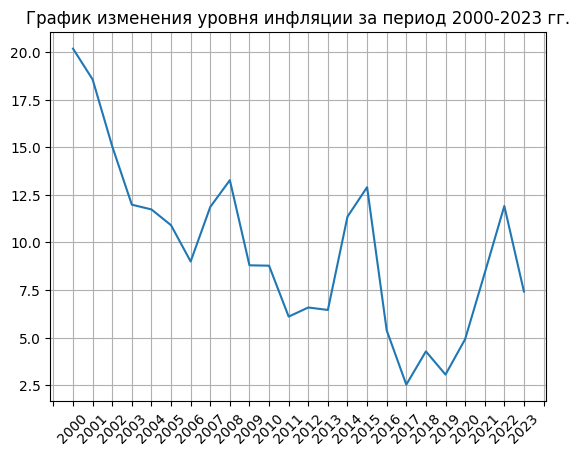

In [13]:
fig, ax = plt.subplots()
ax.plot(years, inflation)
ax.xaxis.set_ticks(years)
ax.set_xticklabels(years, rotation=45)
ax.xaxis.set_major_locator(plt.MultipleLocator(1))
ax.grid()
ax.set_title('График изменения уровня инфляции за период 2000-2023 гг.')

Теперь рассчитаем реальный относительный рост заработной платы с учетом инфляции. Для этого вычтем значение инфляции для каждого года из относительного роста заработной платы за соответствующий год  

In [15]:
df_salary_rel_infl = df_salary.copy(deep=True)
for index, row in df_salary_rel.iterrows():
    for i in range(1,len(row)):
        df_salary_rel_infl.iat[index, i] = df_salary_rel.iat[index, i] - inflation[i - 1]      
df_salary_rel_infl.drop(df_salary_rel_infl.columns[[0]], axis=1, inplace=True)
df_salary_rel_infl.head()

,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,29.450699,8.662414,18.823648,13.905479,16.042960,14.287713,18.444121,14.780907,-8.758355,7.432719,...,5.217916,0.800225,-4.116310,11.945866,7.205537,0.565703,1.933143,9.103975,7.428553,10.977040
1,27.622581,41.103579,0.655750,12.102117,17.453433,17.690368,16.705284,17.054584,4.189294,-2.925169,...,3.798103,-7.238122,-8.602216,2.345719,11.040050,3.619759,3.669357,4.765707,3.153869,0.301074
2,26.836759,41.675102,1.558911,13.917726,16.317242,25.561385,15.528536,18.138967,0.291921,-2.700135,...,4.307396,-7.255522,-7.363316,2.144713,22.642602,3.462281,11.814802,-2.572117,0.941229,-0.676767


Вычленим из общего датафреймма данные по каждой отрасли

In [16]:
man_infl = df_salary_rel_infl.iloc[0]
edu_infl = df_salary_rel_infl.iloc[1]
med_infl = df_salary_rel_infl.iloc[2]

Text(0.5, 1.0, 'График реального изменения зарплат с учетом инфляции')

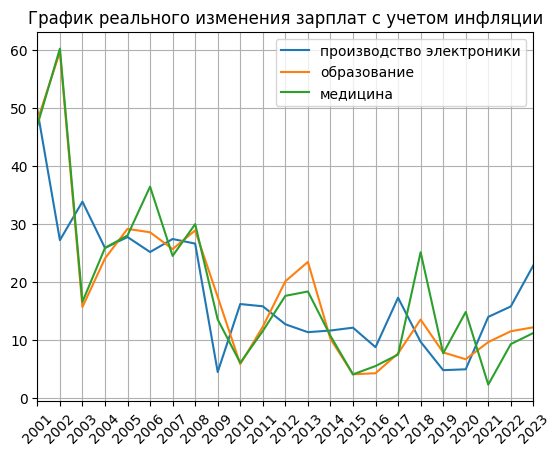

In [20]:
fig, ax = plt.subplots()
ax.plot(years_2001, man, label='производство электроники')
ax.plot(years_2001, edu, label='образование')
ax.plot(years_2001, med, label='медицина')
ax.xaxis.set_ticks(years)
ax.set_xticklabels(years, rotation=45)
ax.set_xlim(2001, 2023)
ax.xaxis.set_major_locator(plt.MultipleLocator(1))
ax.legend()
ax.grid()
ax.set_title('График реального изменения зарплат с учетом инфляции')

Для большего удобства построим отдельный график для каждой отрасли

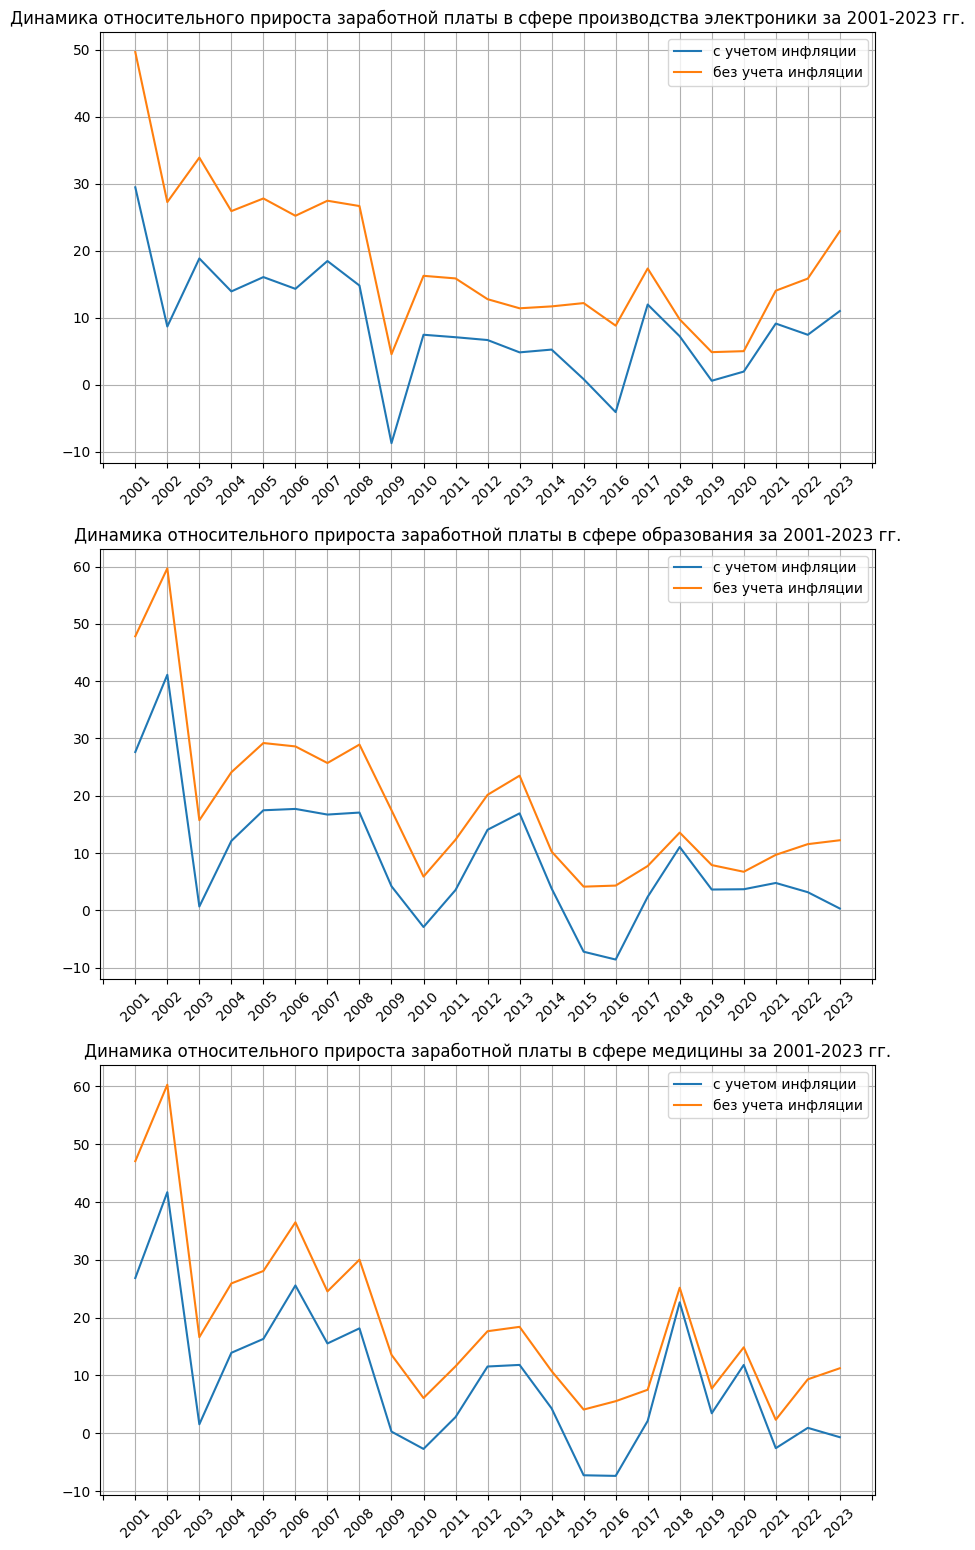

In [21]:
fig, ax = plt.subplots(3, 1, figsize=(10, 19))
ax[0].plot(years_2001, man_infl, label='с учетом инфляции')
ax[0].plot(years_2001, man, label='без учета инфляции')
ax[0].set_title('Динамика относительного прироста заработной платы в сфере производства электроники за 2001-2023 гг.')
ax[1].plot(years_2001, edu_infl, label='с учетом инфляции')
ax[1].plot(years_2001, edu, label='без учета инфляции')
ax[1].set_title('Динамика относительного прироста заработной платы в сфере образования за 2001-2023 гг.')
ax[2].plot(years_2001, med_infl, label='с учетом инфляции')
ax[2].plot(years_2001, med, label='без учета инфляции')
ax[2].set_title('Динамика относительного прироста заработной платы в сфере медицины за 2001-2023 гг.')
for i in range(3):    
        ax[i].xaxis.set_ticks(years_2001)
        ax[i].set_xticklabels(years_2001, rotation=45)       
        ax[i].xaxis.set_major_locator(plt.MultipleLocator(1))
        ax[i].legend()
        ax[i].grid()

# Выводы
1. В некоторые годы уровень инфляции был равен или даже превосхдил ежегодный рост зарплат (например, в 2016 г. для всех трех отраслей)
2. Сфера производства электроники показывает более устойчивый ежегодный прирост заработной платы (снижение реальной зарплаты наблюдалось только в течение 2 лет), в то время как в медицине наблюдается самый низкий реальный рост заработной платы (снижение реальной зарплаты наблюдалось в течение 5 лет). 

In [2]:
column_names_salary = ['area'] + [str(i) for i in range(2000, 2024)]
column_names_salary

['area',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016',
 '2017',
 '2018',
 '2019',
 '2020',
 '2021',
 '2022',
 '2023']